# Operaciones con Matrices y Dataframes

En R se tiene soporte a una estructura de dato sumamente útil para el análisis y organización de observaciones con múltiples variables: El dataframe. Para comprender mejor los dataframes y las operaciones sobre ellos, se repasará y practicará a continuación con operaciones de matrices, las cuales pueden servir para generar dataframes.

## Operaciones con Matrices

### Sumas y productos
Considere el siguiente producto simple de números:

In [1]:
2 * 2

[1] 4

Contrastando ahorita con el operador de producto matricial, `%*%`

In [2]:
2%*%2

4


El resultado será el mismo, pero el tipo de dato retornado será automáticamente una matriz, sin importar que los operandos del producto no lo sean. Probemos multiplicar las siguientes dos matrices:

In [3]:
A <- cbind(c(1,2), c(2,3))
B <- cbind(c(5,1), c(3,2))
A
B

1,2
2,3


5,3
1,2


In [4]:
A%*%B

7,7
13,12


### Álgebra lineal básica
R igualmente tiene implementadas funciones para álgebra lineal general, es decir, podemos realizar cálculos como encontrar el espectro de nuestras matrices:

In [5]:
eig <- eigen(A)

En el siguiente bloque se visualiza lo calculado:
* Los valores propios en orden descendiente
* Los vectores propios enlistados como columnas de una matriz. Éstos están en el mismo orden que los valores propios para corresponder adecuadamente.

In [6]:
eig$values
eig$vectors

[1]  4.236068 -0.236068

0.5257311,-0.8506508
0.8506508,0.5257311


Aquí se ha utilizado el operador `$` para acceder a objetos internos del objeto `eig`. En particular, este operador es a veces conocido como **operador de nombre**, ya que permite hacer referencia a los *nombres* internos de una variable. Para entender con mayor claridad esto, consideremos la funci[on `names()` para enlistar los nombres de la variable `eig`:

In [7]:
names(eig)

[1] "values"  "vectors"

Estos son precisamente los nombres a los que hemos accesido anteriormente. Ahora, aprovechamos que tenemos los vectores propios en el interior de la variable `eig` para introducir la función `crossprod()` la cual calcula el **producto interno usual**, por pares, de una lista de vectores. 

In [8]:
crossprod(eig$vectors)

1.000000e+00,-1.212722e-17
-1.212722e-17,1.000000e+00


Se ve que los elementos en la diagonal toman el valor de 1 (y corresponden a realizar el producto punto de cada valor propio consigo mismo, obteniendo su norma al cuadrado que sabemos que es 1) y los elementos fuera de la diagonal corresponden a números muy pequeños que bien podrían ser considerados 0. 

Esto es sólo una verificación de las propiedades de los vectores propios regresados por la función `eigen()`, son unitarios y ortogonales. 

A veces es útil poder deshacernos de cantidades tan pequeñas, que prácticamente son cero, y lo podemos lograr de la siguiente manera:

In [9]:
zapsmall(crossprod(eig$vectors))

1,0
0,1


Por supuesto, también podemos calcular determinantes:

In [10]:
det(A)

[1] -1

### Resolución de sistemas de ecuaciones
En R también es muy fácil calcular inversas de matriz:

In [11]:
A_inversa <- solve(A)
A_inversa

-3,2
2,-1


Verificamos:

In [12]:
A_inversa%*%A
A%*%A_inversa

1,0
0,1


1,0
0,1


Recordemos que todas estas operaciones son realizadas por R llamando códigos optimizados de librerías de álgebra lineal en C o en Fortran. Por ello, es importante conocer (y utilizar) las funciones ya asignadas para cada labor.

Consideremos ahora la siguiente matriz aleatoria:

In [19]:
n <- 2000
MatNorm <- matrix(rnorm(n*n, mean = 10, sd = 4), nrow = n, ncol = n)

In [ ]:
MatNorm

¿Qué resulta de la siguiente operación?

In [ ]:
# Vector de 1's
matrix(1, n)

In [ ]:
# Media por columnas
t(matrix(1, n))%*%MatNorm/n

Se pueden extraer más propiedades de cualquier matriz aleatoria de esa manera. Por otro lado, esa misma operación se puede calcular mediante:

In [ ]:
colMeans(MatNorm)

Ahora ¿El siguiente código qué hace?

In [ ]:
# Matriz de covarianzas
x <- MatNorm - rep(1,n)%*%t(rep(1,n))%*%MatNorm/n
t(x)%*%x/n

Por supuesto, el mismo cálculo puede ser realizado por funciones ya establecidas en R

In [ ]:
cov(MatNorm)

Otras funciones auxiliares muy útiles son `sum()` y `diag()` que respectivamente calculan la suma de las entradas de un vector, y devuelve un vector con la diagonal de la matriz de su argumento:

In [25]:
sum(diag(t(x)%*%x/n))/n

[1] 15.99363

El comando `diag()` también puede ser utilizado para generar matrices diagonales. Esto ocurre cuando su argumento no es una matriz, si no un número:

In [28]:
diag(1, 4)

1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1


## Operaciones con dataframes

### Análisis exploratorio
Considere el siguiente dataframe cargable por defecto en R

In [1]:
women # Dataframe que viene por defecto en R

height,weight
<dbl>,<dbl>
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139


No es común el desplegar completamente un dataframe, si no que para tener una idea del contenido del dataframe podemos hacer algo de lo siguiente:

Desplegar sólo las primeras entradas con el comando `head()`

In [3]:
head(women)

,height,weight
,<dbl>,<dbl>
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129


Utilizar `summary()` para recibir información estadística directa del contenido

In [4]:
summary(women)

     height         weight     
 Min.   :58.0   Min.   :115.0  
 1st Qu.:61.5   1st Qu.:124.5  
 Median :65.0   Median :135.0  
 Mean   :65.0   Mean   :136.7  
 3rd Qu.:68.5   3rd Qu.:148.0  
 Max.   :72.0   Max.   :164.0  

Podemos averiguar el tamaño de nuestra data mediante las funciones `nrow()` y `ncol()` que averigua el número de filas (usualmente observaciones) y el número de columnas (usualmente variables, factores, features, etc.) respectivamente:

In [5]:
nrow(women)
ncol(women)

[1] 15

[1] 2

... O utilizar directamente el comando `dim()`

In [6]:
dim(women)

[1] 15  2

Similar a la mayoría de otros objetos en R, podemos utilizar también el comando `str()` para obtener un resumen de la **estrutura** del objeto:

In [7]:
str(women)

'data.frame':	15 obs. of  2 variables:
 $ height: num  58 59 60 61 62 63 64 65 66 67 ...
 $ weight: num  115 117 120 123 126 129 132 135 139 142 ...


### Extrayendo data de un dataframe
Las columnas (variables) en un dataframe pueden ser accedidos, como visto anteriormente, con el operador `$`

In [8]:
women$weight

[1] 115 117 120 123 126 129 132 135 139 142 146 150 154 159 164

También podemos filtrar fácilmente acorde a una condición. Considere la condición:

In [9]:
women$weight> 140

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE

Donde podemos ver que sólo algunas entradas cumplen el criterio, y por ende, podemos filtrar otra variable respecto a esa condición:

In [10]:
women$height[women$weight> 140]

[1] 67 68 69 70 71 72

Las anteriores son las alturas de las mujeres con peso mayor a 140. A veces quisieramos poder tomar muestras aleatorias de nuestra data. Considere la siguiente:

In [12]:
str(mtcars) # Por defecto en R-base

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [15]:
IDmuestra <- sample(1:32, size = 10, replace= FALSE)  # Muestra aleatoria simple

In [16]:
mtcars[IDmuestra,] # Es una muestra distinta cada vez

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4


Por último, hablemos sobre algo similar a los **administradores de contexto** en Python. Considere lo siguiente

In [23]:
MBI <- with(women, (weight*0.453592)/(height*0.0254)^2) # Indices de masa corporal
MBI

[1] 24.03476 23.63087 23.43563 23.24039 23.04545 22.85107 22.65750 22.46493
 [9] 22.43494 22.24010 22.19898 22.15088 22.09645 22.17575 22.24215

### Creando dataframes

In [29]:
genero <- c("M", "M", "F", "F", "F")
peso <- c(73, 68, 52, 69, 64)

In [30]:
Estudio <- data.frame(genero, peso)
Estudio 

genero,peso
<chr>,<dbl>
M,73
M,68
F,52
F,69
F,64


### Listas

Los dataframes son un tipo especial de otro tipo de datos llamado **lista**. Las listas son colecciones de otros objetos de R, cualquiera sea su tipo, organizadas de manera que cada elemento de la colección puede ser accedida mediante el nombre de dicha variable:

In [3]:
x <-c(3, 2, 3)
y <-c(7, 7)
z <-list(data1 = x, data2 = y, data3 = women)
z

height,weight
<dbl>,<dbl>
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139


Como ven, es posible tener dataframes como elementos de una lista. En general, de hecho, se pueden tener listas de listas. Esto sirve para organizar muchas veces salidas complejas de funciones que calculen muchas cosas, por ejemplo, la regresión lineal:

In [4]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


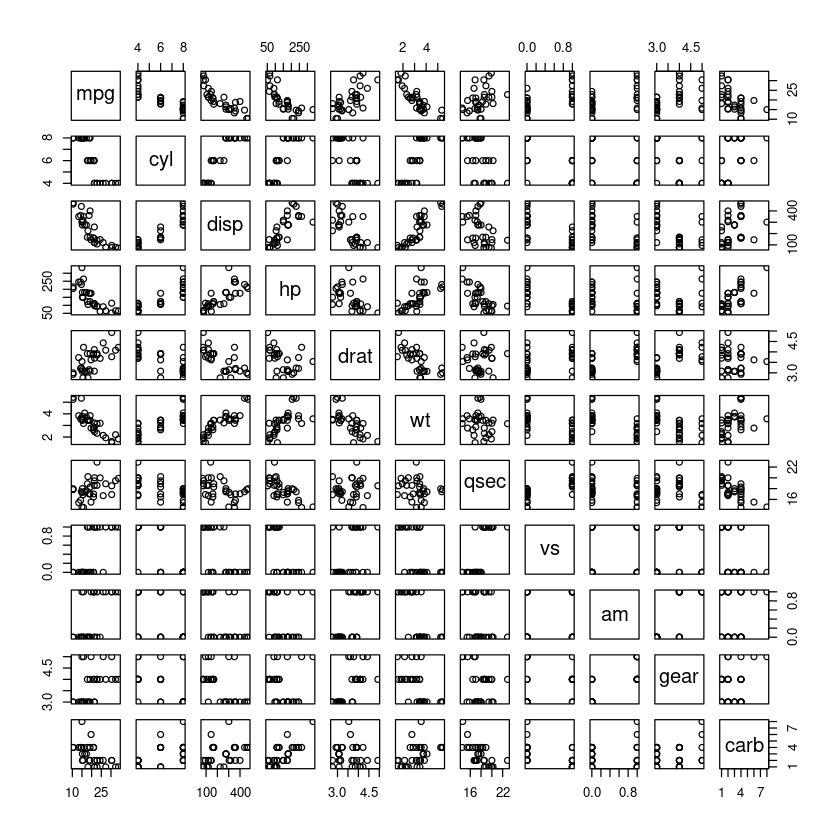

In [9]:
plot(mtcars)

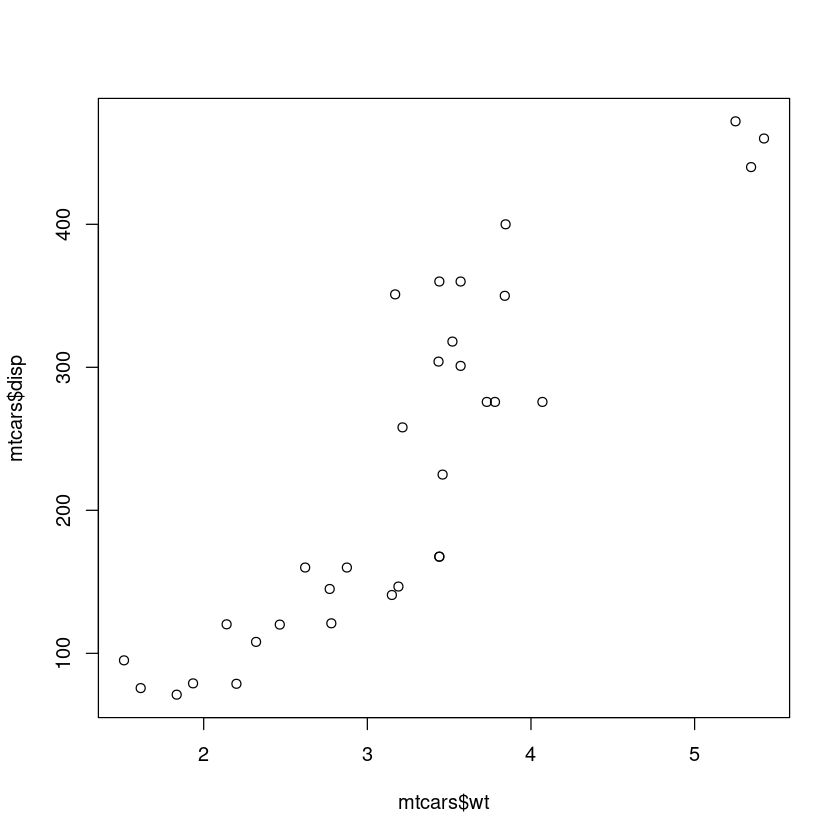

In [10]:
plot(mtcars$wt, mtcars$disp)

In [11]:
model <- lm(mtcars$disp ~ mtcars$wt)

In [13]:
str(model)

List of 12
 $ coefficients : Named num [1:2] -131 112
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "mtcars$wt"
 $ residuals    : Named num [1:32] -3.54 -32.23 -21.8 27.53 104.22 ...
  ..- attr(*, "names")= chr [1:32] "1" "2" "3" "4" ...
 $ effects      : Named num [1:32] -1305.2 612.8 -16.8 27.6 103 ...
  ..- attr(*, "names")= chr [1:32] "(Intercept)" "mtcars$wt" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:32] 164 192 130 230 256 ...
  ..- attr(*, "names")= chr [1:32] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:32, 1:2] -5.657 0.177 0.177 0.177 0.177 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:32] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "mtcars$wt"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.18 1.05
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 30
 $ xlevels      : Named 

In [14]:
model$coefficients

(Intercept)   mtcars$wt 
  -131.1484    112.4781

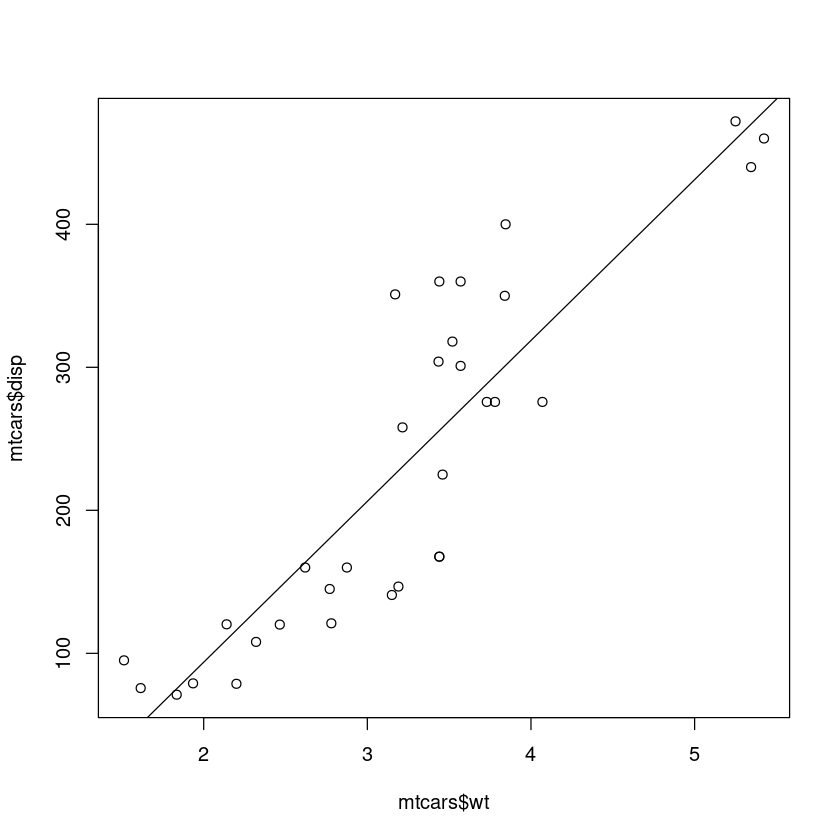

In [17]:
plot(mtcars$wt, mtcars$disp)
abline(model$coefficients)

In [19]:
model$residuals

1          2          3          4          5          6          7 
 -3.544307 -32.226232 -21.800865  27.531201 104.223620 -33.025943  89.601462 
         8          9         10         11         12         13         14 
-80.956846 -82.357720 -88.176380 -88.176380 -50.837608 -12.595040 -18.218947 
        15         16         17         18         19         20         21 
 12.638189 -18.933007 -30.047234 -37.603489  25.196222  -4.148968 -26.010195 
        22         23         24         25         26         27         28 
 53.225369  48.786010  49.232364  98.669974  -7.496782  10.745200  56.068992 
        29         30         31         32 
125.592717 -35.416028  30.601462 -60.540809

[1] "double"

Al igual que los dataframes, las listas pueden ser argumentos de la función `summary()`, para obtener información general fácil

In [20]:
summary(model)


Call:
lm(formula = mtcars$disp ~ mtcars$wt)

Residuals:
   Min     1Q Median     3Q    Max 
-88.18 -33.62 -10.05  35.15 125.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -131.15      35.72  -3.672 0.000933 ***
mtcars$wt     112.48      10.64  10.576 1.22e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.94 on 30 degrees of freedom
Multiple R-squared:  0.7885,	Adjusted R-squared:  0.7815 
F-statistic: 111.8 on 1 and 30 DF,  p-value: 1.222e-11


Vemos que tanto el $R^2$ es relativamente bajo como los errores en los estimadores son altos (especialmente el del intercepto). Eso, junto con análisis posibles en los residuales, nos puede dar indicio de que estamos utilizamos un modelo equivocado. Probando ahora sin intercepto:

In [21]:
model2 <- lm(mtcars$disp ~ mtcars$wt - 1)
summary(model2)


Call:
lm(formula = mtcars$disp ~ mtcars$wt - 1)

Residuals:
   Min     1Q Median     3Q    Max 
-95.66 -66.18 -32.22  47.82 113.04 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
mtcars$wt   75.066      3.612   20.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68.62 on 31 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.9309 
F-statistic: 431.9 on 1 and 31 DF,  p-value: < 2.2e-16


### Operaciones con listas